**II. Data preprocessing – Tiền xử lý dữ liệu**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Data Model - Pizza Sales.xlsx')

In [ ]:
#df =pd.read_csv('/content/drive/MyDrive/Data Model - Pizza Sales.csv')

In [ ]:
df.sample(5)


,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
16135,16136,7105,ckn_alfredo_l,1,2015-04-29,21:25:35,20.75,20.75,L,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
41157,41158,18129,five_cheese_l,1,2015-11-05,18:28:21,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
24223,24224,10643,veggie_veg_l,1,2015-06-27,22:19:55,20.25,20.25,L,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",The Vegetables + Vegetables Pizza
28888,28889,12744,ital_supr_l,1,2015-08-01,13:45:18,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
36618,36619,16156,sicilian_m,1,2015-09-29,18:26:31,16.25,16.25,M,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza


1. Kiểm tra dữ liệu: Công cụ Python

1.1 Tổng quan về các hàng và cột

In [ ]:
df.shape

(48620, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [ ]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [ ]:
df.describe(include='all')

<ipython-input-10-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
count,48620.000000,48620.000000,48620,48620.000000,48620,48620,48620.000000,48620.000000,48620,48620,48620,48620
unique,NaN,NaN,91,NaN,358,16382,NaN,NaN,5,4,32,32
top,NaN,NaN,big_meat_s,NaN,2015-11-26 00:00:00,12:32:00,NaN,NaN,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
freq,NaN,NaN,1811,NaN,261,26,NaN,NaN,18526,14579,2416,2416
first,NaN,NaN,NaN,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2015-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,24310.500000,10701.479761,NaN,1.019622,NaN,NaN,16.494132,16.821474,NaN,NaN,NaN,NaN
std,14035.529381,6180.119770,NaN,0.143077,NaN,NaN,3.621789,4.437398,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1.000000,NaN,NaN,9.750000,9.750000,NaN,NaN,NaN,NaN
25%,12155.750000,5337.000000,NaN,1.000000,NaN,NaN,12.750000,12.750000,NaN,NaN,NaN,NaN


1.2 Kiểm tra dữ liệu bị trùng lặp hoặc rỗng: Không có

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

1.3 Kiểm tra kiểu dữ liệu: Không cần thay đổi kiểu dữ liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


->	Dữ liệu đạt chuẩn để phân tích không cần thêm các bước xử lý khác

**III. Phân tích**

1a. Tổng quan sản phẩm


In [ ]:
## Pizza có giá thấp nhất
lowest_priced_pizza = df[['pizza_name', 'unit_price']].sort_values(by='unit_price').iloc[0]
print("Pizza có giá thấp nhất là:\n", lowest_priced_pizza)

Pizza có giá thấp nhất là:
 pizza_name    The Pepperoni Pizza
unit_price                   9.75
Name: 7636, dtype: object


In [ ]:
## Pizza có giá cao nhất là
highest_priced_pizza = df[['pizza_name', 'unit_price']].sort_values(by='unit_price', ascending=False).iloc[0]
print("Pizza có giá cao nhất là:\n", highest_priced_pizza)

Pizza có giá cao nhất là:
 pizza_name    The Greek Pizza
unit_price              35.95
Name: 22903, dtype: object


In [ ]:
## Số lượng sản phẩm theo kích cỡ
pizzas_per_size = df['pizza_size'].value_counts()
print("Số lượng sản phẩm Pizza theo kích cỡ:\n", pizzas_per_size)

Số lượng sản phẩm Pizza theo kích cỡ:
 L      18526
M      15385
S      14137
XL       544
XXL       28
Name: pizza_size, dtype: int64


In [ ]:
## Tổng số lượng sản phẩm mỗi loại
pizzas_per_category = df['pizza_category'].value_counts()
print("Tổng số lượng Pizza mỗi loại:\n", pizzas_per_category)

Tổng số lượng Pizza mỗi loại:
 Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: pizza_category, dtype: int64


In [ ]:
## Tỉ trọng phân bổ Pizza mỗi loại
pizzas_per_category.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tỉ trọng Pizza theo loại')
plt.axis('equal')
plt.show()

In [ ]:
## Món ăn được đặt hàng nhiều nhất
most_ordered_pizza = df.groupby('pizza_name').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(5, 'order_count')
print("Món Pizza được đặt hàng nhiều nhất là:\n", most_ordered_pizza)

Món Pizza được đặt hàng nhiều nhất là:
                             order_count  average_unit_price
pizza_name                                                 
The Classic Deluxe Pizza           2416           15.575952
The Barbecue Chicken Pizza         2372           17.572934
The Hawaiian Pizza                 2370           13.317194
The Pepperoni Pizza                2369           12.468658
The Thai Chicken Pizza             2315           18.286069


In [ ]:
## Món ăn được đặt hàng ít nhất
fewest_ordered_pizza = df.groupby('pizza_name').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nsmallest(5, 'order_count')
print("Món Pizza được đặt hàng nhiều nhất là:\n", most_ordered_pizza)

Món Pizza được đặt hàng nhiều nhất là:
                             order_count  average_unit_price
pizza_name                                                 
The Classic Deluxe Pizza           2416           15.575952
The Barbecue Chicken Pizza         2372           17.572934
The Hawaiian Pizza                 2370           13.317194
The Pepperoni Pizza                2369           12.468658
The Thai Chicken Pizza             2315           18.286069


In [ ]:
## Món ăn được ưa chuộng nhất
favorite_pizza = df.groupby(['pizza_name', 'pizza_size'])['order_id'].count().idxmax()
print("Pizza được ưa chuộng nhất là:", favorite_pizza)

Pizza được ưa chuộng nhất là: ('The Big Meat Pizza', 'S')


1b. Tổng quan kinh doanh

In [ ]:
## Tổng doanh thu
total_revenue = (df['total_price']).sum()
print("Tổng doanh thu:", round(total_revenue,1))

Tổng doanh thu: 817860.0


In [ ]:
## Tổng số lượng đơn hàng
total_orders = len(df.groupby('order_id').count())
print("Tổng số lượng đơn hàng:", total_orders)

Tổng số lượng đơn hàng: 21350


In [ ]:
## Tổng số lượng Pizza bán ra
total_pizzas_sold = df['quantity'].sum()
print("Tổng số lượng Pizza bán ra:", total_pizzas_sold)

Tổng số lượng Pizza bán ra: 49574


In [ ]:
## Trung bình số lượng đơn hàng
avg_order_value = df.groupby('order_id')['total_price'].sum().mean().round(0)
print("Trung bình số lượng đơn hàng:", avg_order_value)

Trung bình số lượng đơn hàng: 38.0


In [ ]:
## Trung bình số lượng Pizza mỗi đơn hàng
avg_pizzas_per_order = df['quantity'].sum() / total_orders
print("Trung bình số lượng Pizza mỗi đơn hàng:", round(avg_pizzas_per_order,1))

Trung bình số lượng Pizza mỗi đơn hàng: 2.3


2. Bán hàng


In [ ]:
## Trung bình giá bán và Doanh thu theo Loại Pizza
category_analysis = df.groupby('pizza_category').agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_category=('unit_price', lambda x: (x * df['quantity']).sum())
).sort_values(by='revenue_per_category', ascending=False).round(1)
#category_analysis.loc['Total'] = category_analysis.sum()
print("Trung bình giá bán và Doanh thu theo Loại Pizza:\n", category_analysis)

Trung bình giá bán và Doanh thu theo Loại Pizza:
                 average_unit_price  revenue_per_category
pizza_category                                          
Classic                       14.8              220053.1
Supreme                       17.4              208197.0
Chicken                       17.7              195919.5
Veggie                        16.6              193690.4


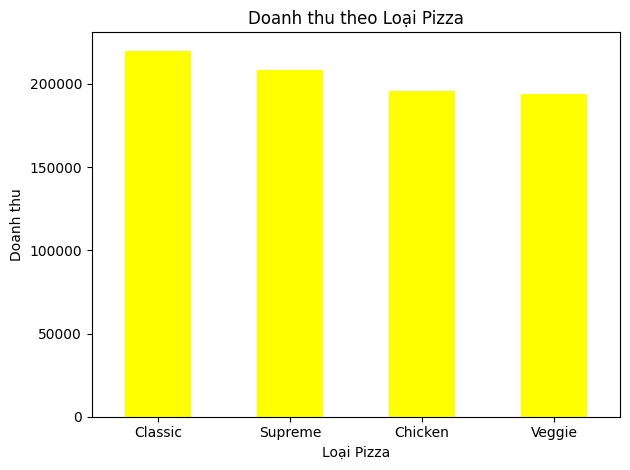

In [ ]:
## Biểu đồ phân tích doanh thu theo Loại Pizza
category_analysis['revenue_per_category'].plot(kind='bar', color='yellow')
plt.xlabel('Loại Pizza')
plt.ylabel('Doanh thu')
plt.title('Doanh thu theo Loại Pizza')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
## Trung bình giá bán và Doanh thu theo Kích cỡ Pizza
size_analysis = df.groupby('pizza_size').agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_size=('unit_price', lambda x: (x * df['quantity']).sum())
).sort_values(by='revenue_per_size', ascending=False).round(1)
#size_analysis.loc['Total'] = size_analysis.sum()
print("Trung bình giá bán và Doanh thu theo Kích cỡ Pizza:\n", size_analysis)

Trung bình giá bán và Doanh thu theo Kích cỡ Pizza:
             average_unit_price  revenue_per_size
pizza_size                                      
L                         19.8          375318.7
M                         16.0          249382.2
S                         12.4          178076.5
XL                        25.5           14076.0
XXL                       36.0            1006.6


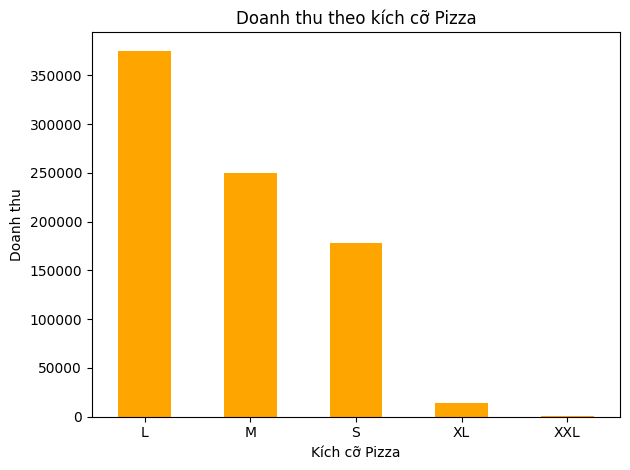

In [ ]:
## Biểu đồ phân tích doanh thu theo kích cỡ Pizza
size_analysis['revenue_per_size'].plot(kind='bar', color='orange')
plt.xlabel('Kích cỡ Pizza')
plt.ylabel('Doanh thu')
plt.title('Doanh thu theo kích cỡ Pizza')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
## Trung bình giá bán và Doanh thu của Top 10 Pizza
top_pizza_analysis = df.groupby('pizza_name').agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_pizza=('unit_price', lambda x: (x * df['quantity']).sum())
).nlargest(10, 'revenue_per_pizza').round(1)
#top_pizza_analysis.loc['Total'] = top_pizza_analysis.sum()
print("Trung bình giá bán và Doanh thu của Top 10 Pizza:\n", top_pizza_analysis)

Trung bình giá bán và Doanh thu của Top 10 Pizza:
                               average_unit_price  revenue_per_pizza
pizza_name                                                         
The Thai Chicken Pizza                      18.3            43434.2
The Barbecue Chicken Pizza                  17.6            42768.0
The California Chicken Pizza                17.4            41409.5
The Classic Deluxe Pizza                    15.6            38180.5
The Spicy Italian Pizza                     18.1            34831.2
The Southwest Chicken Pizza                 18.1            34705.8
The Italian Supreme Pizza                   17.8            33476.8
The Hawaiian Pizza                          13.3            32273.2
The Four Cheese Pizza                       17.0            32265.7
The Sicilian Pizza                          16.0            30940.5


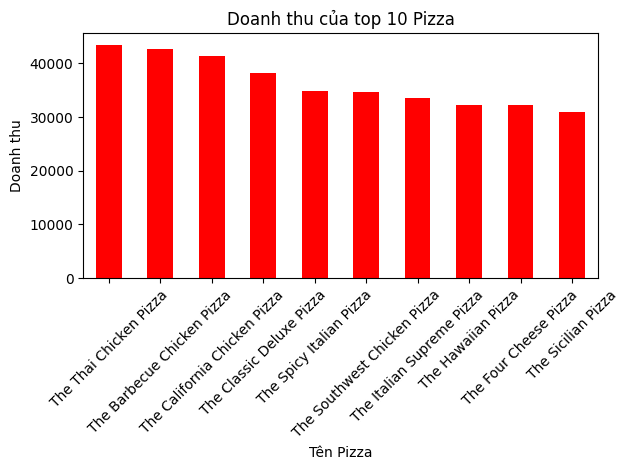

In [ ]:
# Biểu đồ phân tích doanh thu của top 10 Pizza
top_pizza_analysis['revenue_per_pizza'].plot(kind='bar', color='Red')
plt.xlabel('Tên Pizza')
plt.ylabel('Doanh thu')
plt.title('Doanh thu của top 10 Pizza')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Xu hướng

In [ ]:
## Số lượng đơn hàng lớn nhất của từng ngày trong tuần
df['Ngày trong tuần'] = pd.to_datetime(df['order_date']).dt.strftime('%A')
day_of_week_analysis = df.groupby('Ngày trong tuần')['order_id'].count().sort_values(ascending=False)
#day_of_week_analysis.loc['Total'] = day_of_week_analysis.sum()
print("Số lượng đơn hàng lớn nhất của từng ngày trong tuần:\n", day_of_week_analysis)

Số lượng đơn hàng lớn nhất của từng ngày trong tuần:
 Ngày trong tuần
Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: order_id, dtype: int64


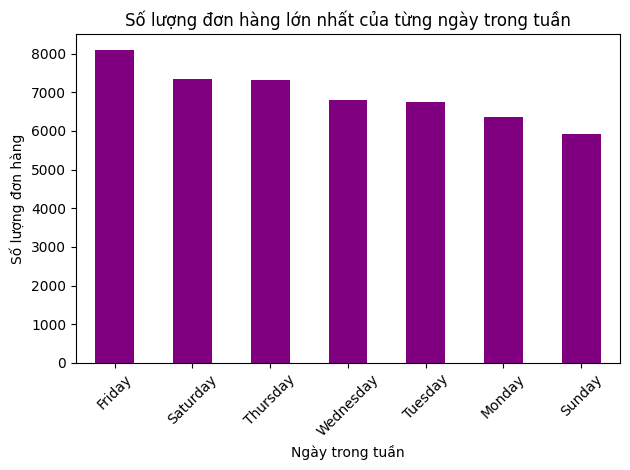

In [ ]:
## Biểu đồ phân tích số lượng đơn hàng theo ngày trong tuần
day_of_week_analysis.plot(kind='bar', color='purple')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Số lượng đơn hàng')
plt.title('Số lượng đơn hàng lớn nhất của từng ngày trong tuần')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#df['Thời gian nhận đơn'] = df['order_time'].astype('string').str.slice(0, 5)
#delivery_time_analysis = df.groupby('Thời gian nhận đơn')['order_id'].count().nlargest(10).sort_values(ascending=False)
#delivery_time_analysis.loc['Total'] = delivery_time_analysis.sum()
#print("Thời điểm có nhiều đơn hàng nhất:\n", delivery_time_analysis)

In [ ]:
dfc= df.copy()

In [ ]:
# Giờ cao điểm
dfc['Thời gian nhận đơn'] = dfc['order_time'].astype('string').str.slice(0, 5).str.slice(0, 2)
delivery_time_analysis = dfc.groupby('Thời gian nhận đơn')['order_id'].count().sort_values(ascending=False)
#delivery_time_analysis.loc['Total'] = delivery_time_analysis.sum()
print("Thời điểm có nhiều đơn hàng nhất:\n", delivery_time_analysis)

Thời điểm có nhiều đơn hàng nhất:
 Thời gian nhận đơn
12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
09       4
Name: order_id, dtype: int64


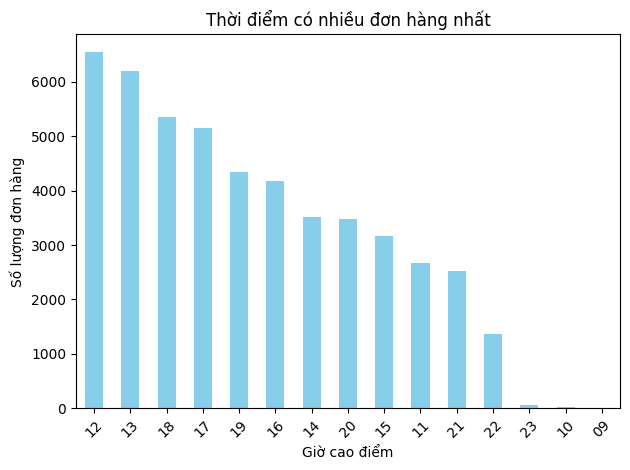

In [ ]:
## Biểu đồ phân tích đơn hàng theo giờ cao điểm
delivery_time_analysis.plot(kind='bar', color='skyblue')
plt.xlabel('Giờ cao điểm')
plt.ylabel('Số lượng đơn hàng')
plt.title('Thời điểm có nhiều đơn hàng nhất')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
## Tháng có doanh thu cao nhất
month_revenue_analysis = df.groupby(pd.to_datetime(df['order_date']).dt.strftime('%B'))['total_price'].sum().round(1).sort_values(ascending=False)
#month_revenue_analysis.loc['Total'] = month_revenue_analysis.sum()
print("Tháng có doanh thu cao nhất:\n", month_revenue_analysis)

Tháng có doanh thu cao nhất:
 order_date
July         72557.9
May          71402.8
March        70397.1
November     70395.4
January      69793.3
April        68736.8
August       68278.2
June         68230.2
February     65159.6
December     64701.2
September    64180.0
October      64027.6
Name: total_price, dtype: float64


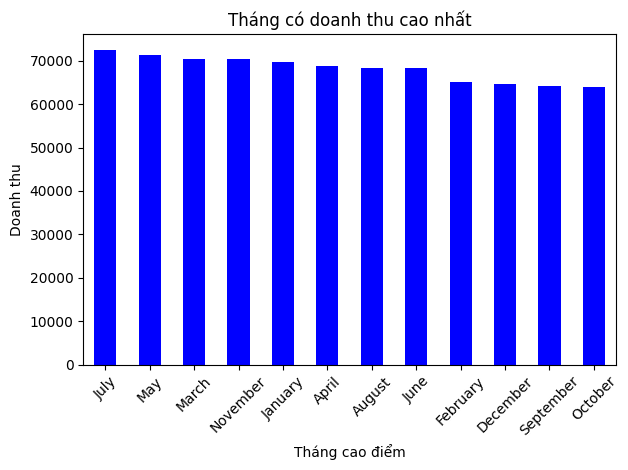

In [ ]:
## Biểu đồ phân tích đơn hàng theo tháng cao điểm
month_revenue_analysis.plot(kind='bar', color='blue')
plt.xlabel('Tháng cao điểm')
plt.ylabel('Doanh thu')
plt.title('Tháng có doanh thu cao nhất')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def categorize_season(month):
    if month in ['March', 'April', 'May']:
        return 'Mùa Xuân'
    elif month in ['June', 'July', 'August']:
        return 'Mùa Hè'
    elif month in ['September', 'October', 'November']:
        return 'Mùa Thu'
    else:
        return 'Mùa Đông'

In [ ]:
## Mùa có doanh thu cao nhất
df['Mùa'] = pd.to_datetime(df['order_date']).dt.strftime('%B').map(categorize_season)
seasonal_revenue_analysis = df.groupby('Mùa')['total_price'].sum().sort_values(ascending=False)
#seasonal_revenue_analysis.loc['Total'] = seasonal_revenue_analysis.sum()
print("Mùa có doanh thu cao nhất:\n", seasonal_revenue_analysis)

Mùa có doanh thu cao nhất:
 Mùa
Mùa Xuân    210536.65
Mùa Hè      209066.35
Mùa Đông    199654.05
Mùa Thu     198603.00
Name: total_price, dtype: float64


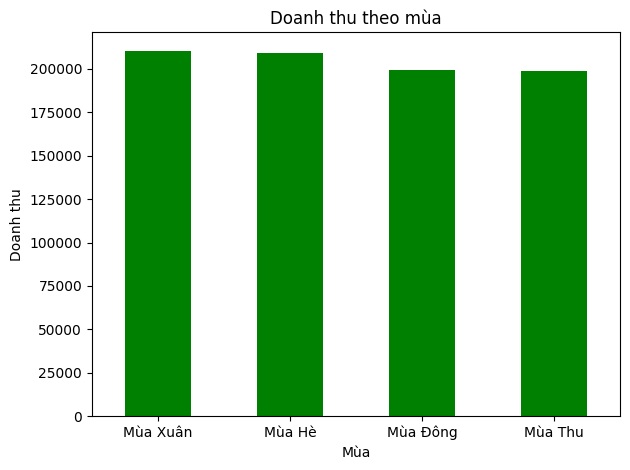

In [ ]:
## Biểu đồ phân tích đơn hàng theo mùa
seasonal_revenue_analysis.plot(kind='bar', color='green')
plt.xlabel('Mùa')
plt.ylabel('Doanh thu')
plt.title('Doanh thu theo mùa')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

----------------------------------------


**Other**

In [ ]:
df['order_time']=df['order_time'].astype('string')
df[['Hour','Minute', 'Second']]= df['order_time'].str.split(":",expand=True)
dfc = df["Hour"].value_counts()
print("Thời điểm có nhiều đơn hàng nhất:\n", dfc)

In [ ]:
dfc.plot(kind='bar', color='skyblue')
plt.xlabel('Giờ cao điểm')
plt.ylabel('Số lượng đơn hàng')
plt.title('Thời điểm có nhiều đơn hàng nhất')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

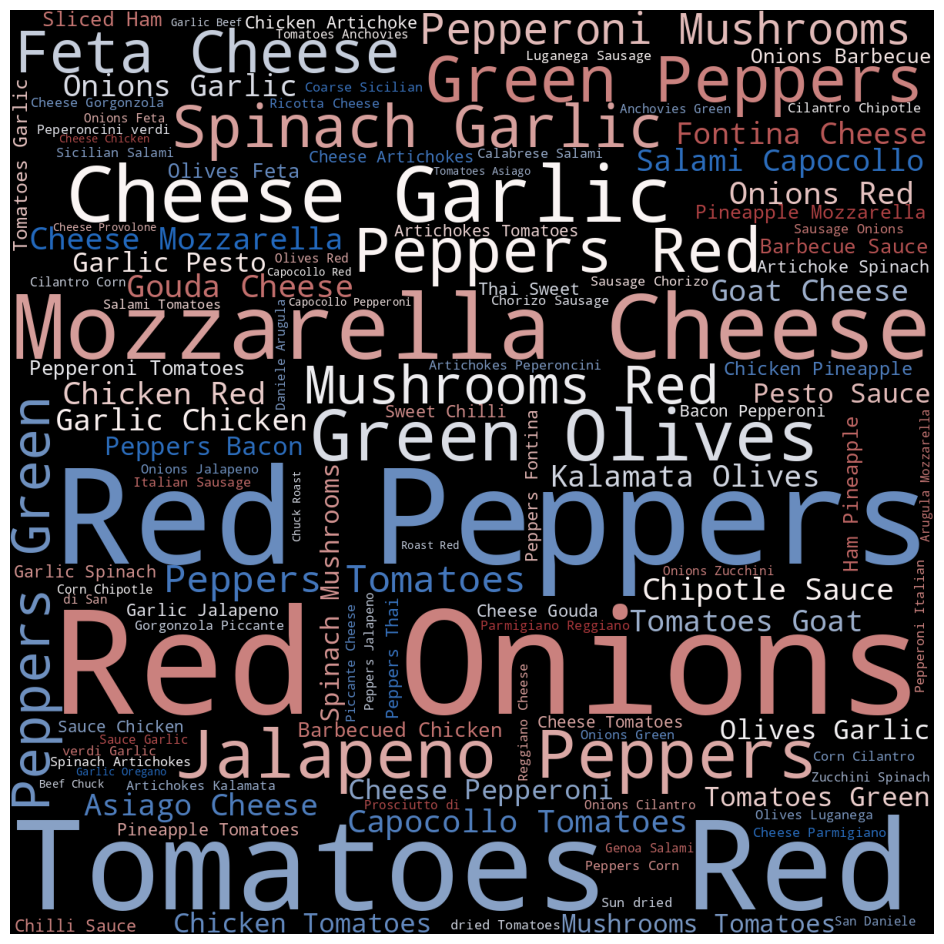

In [ ]:
text = ' '.join(df['pizza_ingredients'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()

In [ ]:
pineapple = df.loc[df['pizza_ingredients'].str.contains('Pineapple')]
pineapple['pizza_name'].unique()

array(['The Hawaiian Pizza', 'The Thai Chicken Pizza'], dtype=object)

In [ ]:
pineapple['quantity'].sum()

4793

Theo bộ dữ liệu, khách hàng có vẻ thích ăn dứa trên pizza: Hai loại pizza có dứa là Hawaian Pizza và Thai Chicken Pizza, được cho là loại pizza bán chạy thứ 2 và thứ 5 tại thời điểm này.

In [ ]:
## Món ăn được đặt hàng ÍT nhất
least_ordered_pizza = df.groupby('pizza_name').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nsmallest(5, 'order_count')
print("Món Pizza được đặt hàng ÍT nhất là:\n", least_ordered_pizza)

-------------------------------------------------------------------------------